# CS412 - Machine Learning - 2021
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision Tree and k-NN approaches
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. Reserve 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the rest for development (learning your models). The official test data (10,000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier (decision tree and k-NN) with the Scikit library function calls to classify digits in the MNIST dataset.

## Software: 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

When you search for decision tree for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
#this cell can be skipped at the running time
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np # I am loading the numpy library
import matplotlib.pyplot as plt # I am loading the pyplot library
from timeit import default_timer as timer

# Read data 
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

..

In [ ]:
#this cell can be skipped at the running
#print attribute names


In [ ]:
# print shape
print('Data Dimensionality: ')
print("Training data shape is as follows: ", x_train.shape)
print("Test data shape is as follows: ", x_test.shape)

# reshape the data into usable vectorized way
x_trainf = x_train.reshape(x_train.shape[0], -1) 
# -1 calculates the remaining dimension automatically
x_testf = x_test.reshape(x_test.shape[0], -1) 
# it is for flattening the data indeed

print("\nAfter reshaping process")
print('Data Dimensionality: ')
print("Training data shape is as follows: ", x_trainf.shape)
print("Test data shape is as follows: ", x_testf.shape)

x_traindf = pd.DataFrame(x_trainf)
# I am going to convert ytrain to a dataframe and column name as label 
#so that it is easier to follow 
# when we are going to concatenate with the x_train
y_traindf = pd.DataFrame(y_train, columns = ["label"])

# now it is time for concatenation
train_df = pd.concat((x_traindf, y_traindf), axis=1)

#Additionally, we can get some general information about the dataframe 
#by using info function

# we can also show the column names(attributes)
print('\nAttributes are as folllows: ')
print(train_df.columns)

# print first 5 rows in your dataset
print('\nHead of Data: ')
train_df.head() #5 rows automatically 
#if you want you can add parameter 10, 20, etc. to see different 
#amount of rows in the dataset



Data Dimensionality: 
Training data shape is as follows:  (60000, 28, 28)
Test data shape is as follows:  (10000, 28, 28)

After reshaping process
Data Dimensionality: 
Training data shape is as follows:  (60000, 784)
Test data shape is as follows:  (10000, 784)

Attributes are as folllows: 
Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)

Head of Data: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data
print("Shuffling process has started")
x_trainf, y_train = shuffle(x_trainf, y_train, random_state = 42)
print("Shuffling process has finished where random state equals to 42")
# Split 80-20

from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x_trainf, y_train, 
                                              test_size = 0.2, 
                                              random_state = 42)
print("\nAfter splitting process")
print('Data Dimensionality: ')
print("Train data shape is as follows: ", xtrain.shape)
print("Validation data shape is as follows: ", xval.shape)
print("Train label data shape is as follows: ", ytrain.shape)
print("Validation label data shape is as follows: ", yval.shape)

Shuffling process has started
Shuffling process has finished where random state equals to 42

After splitting process
Data Dimensionality: 
Train data shape is as follows:  (48000, 784)
Validation data shape is as follows:  (12000, 784)
Train label data shape is as follows:  (48000,)
Validation label data shape is as follows:  (12000,)


##5) Train decision tree and k-NN  classifiers on development data and do model selection using the validation data


* Train a decision tree (try  4 different meta-parameters, varying max_depth and min_samples_split. You should play with different values, maybe 10 or 20 for max-depth and 100 or 200 for min_samples_split) and a k-NN classifier (use k=3 and k=7, do not try other values) with the rest of the parameters set to default. 

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
# Train Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
start = timer()
max_depth_array = np.arange(10, 21, 5)
min_samples_array = [25, 50, 100]
best_acc = 0
best_depth = 0
best_sample_split = 0
accs = []
for i in max_depth_array:
  for j in min_samples_array:
    decision_tree = DecisionTreeClassifier(max_depth = i, min_samples_split = j)
    decision_tree.fit(xtrain, ytrain)
    ypred_on_train = decision_tree.predict(xtrain)
    acc_score = accuracy_score(ytrain, ypred_on_train)
    print("Training Accuracy is ", acc_score, 
          ", obtained with maximum depth = ", i, " and min_samples_split = ", j)
    accs.append(acc_score)
    if(acc_score > best_acc):
      best_acc = acc_score
      best_depth = i 
      best_sample_split = j
# ...
end = timer()
print("\nBest training accuracy is ", 
      best_acc, ", obtained with maximum depth = ", 
      best_depth, " and min_samples_split = ", best_sample_split)
print("Total time = ", '{:.3f}'.format((end-start)), "s")
# Report your results    

Training Accuracy is  0.8934166666666666 , obtained with maximum depth =  10  and min_samples_split =  25
Training Accuracy is  0.8811875 , obtained with maximum depth =  10  and min_samples_split =  50
Training Accuracy is  0.8620416666666667 , obtained with maximum depth =  10  and min_samples_split =  100
Training Accuracy is  0.9302083333333333 , obtained with maximum depth =  15  and min_samples_split =  25
Training Accuracy is  0.9065416666666667 , obtained with maximum depth =  15  and min_samples_split =  50
Training Accuracy is  0.8762083333333334 , obtained with maximum depth =  15  and min_samples_split =  100
Training Accuracy is  0.9326458333333333 , obtained with maximum depth =  20  and min_samples_split =  25
Training Accuracy is  0.908125 , obtained with maximum depth =  20  and min_samples_split =  50
Training Accuracy is  0.8772708333333333 , obtained with maximum depth =  20  and min_samples_split =  100

Best training accuracy is  0.9326458333333333 , obtained with

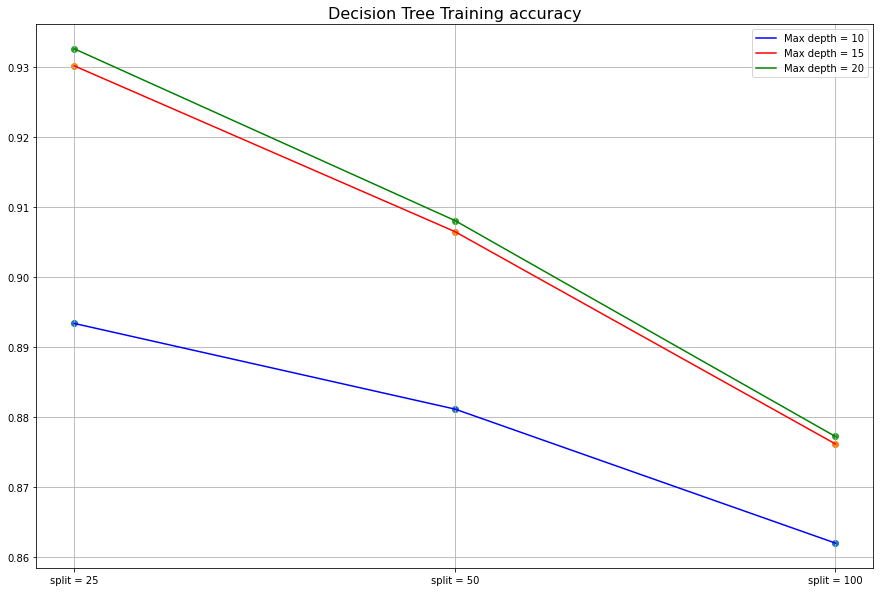

In [ ]:
plt.figure(figsize = (15, 10))
x_axis = ['split = 25', 'split = 50', 'split = 100']
axes0_acc = [accs[0] , accs[1], accs[2]] 
axes1_acc = [accs[3] , accs[4], accs[5]] 
axes2_acc = [accs[6] , accs[7], accs[8]] 
plt.scatter(x_axis, axes0_acc)
plt.scatter(x_axis, axes1_acc)
plt.scatter(x_axis, axes2_acc)

plt.plot(x_axis, axes0_acc, color = "blue", label = "Max depth = 10")
plt.plot(x_axis, axes1_acc, color = "red", label = "Max depth = 15")
plt.plot(x_axis, axes2_acc, color = "green", label = "Max depth = 20")

plt.title("Decision Tree Training accuracy",fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Train k-NN classifiers
from sklearn.neighbors import KNeighborsClassifier
k_array = np.arange(3,8, 4)
best_acc_knn = 0
best_k = 0
accs_knn = []
start = timer()
for i in k_array:
  knn1 = KNeighborsClassifier(n_neighbors = i, algorithm= "brute") 
  # since we have a lot of features
  knn1.fit(xtrain, ytrain)
  ypred_on_train_knn = knn1.predict(xtrain)
  acc_score_knn = accuracy_score(ytrain, ypred_on_train_knn)
  print("Training Accuracy is ", acc_score_knn, ", with k = ", i)
  accs_knn.append(acc_score_knn)
  if(acc_score_knn > best_acc_knn):
    best_acc_knn = acc_score_knn
    best_k = i 
end = timer()
print("\nBest Training Accuracy is ", best_acc_knn, ", with k = ", best_k)
print("Total time = ", '{:.3f}'.format((end-start)), "s")

# Report your results 

Training Accuracy is  0.9852708333333333 , with k =  3
Training Accuracy is  0.9767083333333333 , with k =  7

Best Training Accuracy is  0.9852708333333333 , with k =  3
Total time =  294.337 s


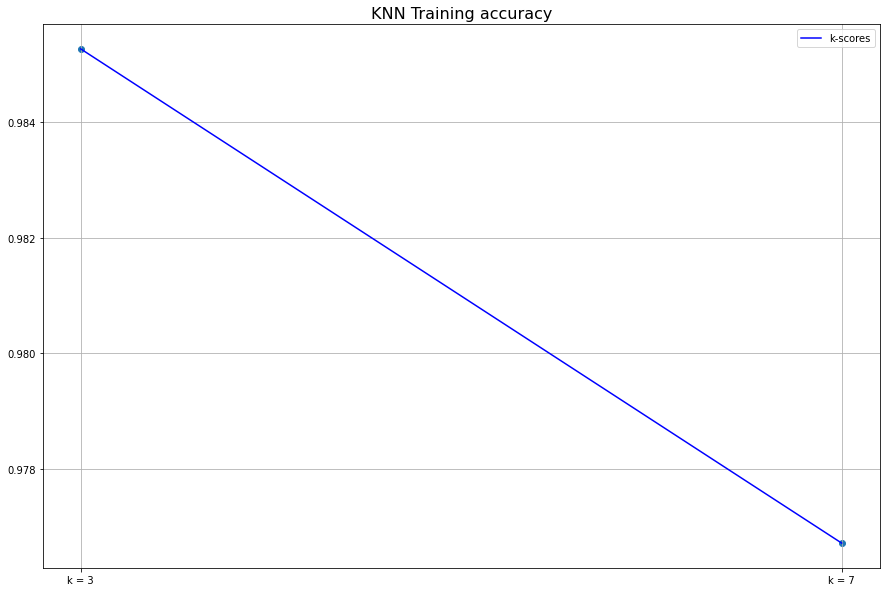

In [ ]:
plt.figure(figsize = (15, 10))
x_axis = ['k = 3', 'k = 7']
axes0_acc = [accs_knn[0], accs_knn[1]] 

plt.scatter(x_axis, axes0_acc)

plt.plot(x_axis, axes0_acc, color = "blue", label = "k-scores")
plt.title("KNN Training accuracy",fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

## 6) Test your trained classifiers on the Validation set
Test your trained classifiers on the validation set and print the accuracies.


In [ ]:
from sklearn.metrics import accuracy_score

# Use misclassification rate as error measure

start = timer()
best_acc = 0
best_depth = 0
best_sample_split = 0
accs = []
for i in max_depth_array:
  for j in min_samples_array:
    decision_tree = DecisionTreeClassifier(max_depth = i, min_samples_split = j)
    decision_tree.fit(xtrain, ytrain)
    ypred_on_val = decision_tree.predict(xval)
    acc_score = accuracy_score(yval, ypred_on_val)
    misclassification_rate = 1 - acc_score
    print("Validation Accuracy is ", 
          acc_score, " and misclassification rate is ",
          '{:.5f}'.format(misclassification_rate) ,
          "obtained with maximum depth = ", i, " and min_samples_split = ", j)
    accs.append(acc_score)
    if(acc_score > best_acc):
      best_acc = acc_score
      best_depth = i 
      best_sample_split = j
# ...
end = timer()
print("\nBest validation accuracy is ", 
      best_acc," and misclassification rate is ",
      1 - best_acc, ", obtained with maximum depth = ", 
      best_depth, " and min_samples_split = ", best_sample_split)
print("Total time = ", '{:.3f}'.format((end-start)), "s")


# Report your results




Validation Accuracy is  0.8506666666666667  and misclassification rate is  0.14933 obtained with maximum depth =  10  and min_samples_split =  25
Validation Accuracy is  0.8428333333333333  and misclassification rate is  0.15717 obtained with maximum depth =  10  and min_samples_split =  50
Validation Accuracy is  0.832  and misclassification rate is  0.16800 obtained with maximum depth =  10  and min_samples_split =  100
Validation Accuracy is  0.86475  and misclassification rate is  0.13525 obtained with maximum depth =  15  and min_samples_split =  25
Validation Accuracy is  0.85475  and misclassification rate is  0.14525 obtained with maximum depth =  15  and min_samples_split =  50
Validation Accuracy is  0.8406666666666667  and misclassification rate is  0.15933 obtained with maximum depth =  15  and min_samples_split =  100
Validation Accuracy is  0.86425  and misclassification rate is  0.13575 obtained with maximum depth =  20  and min_samples_split =  25
Validation Accuracy is

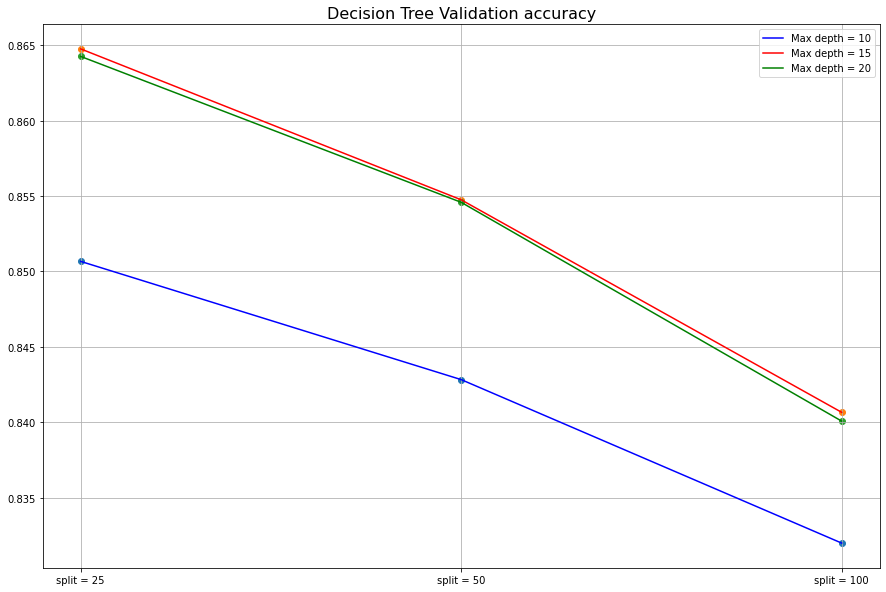

In [ ]:
plt.figure(figsize = (15, 10))
x_axis = ['split = 25', 'split = 50', 'split = 100']
axes0_acc = [accs[0] , accs[1], accs[2]] 
axes1_acc = [accs[3] , accs[4], accs[5]] 
axes2_acc = [accs[6] , accs[7], accs[8]] 
plt.scatter(x_axis, axes0_acc)
plt.scatter(x_axis, axes1_acc)
plt.scatter(x_axis, axes2_acc)

plt.plot(x_axis, axes0_acc, color = "blue", label = "Max depth = 10")
plt.plot(x_axis, axes1_acc, color = "red", label = "Max depth = 15")
plt.plot(x_axis, axes2_acc, color = "green", label = "Max depth = 20")

plt.title("Decision Tree Validation accuracy",fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
start = timer()
best_acc_knn = 0
best_k = 0
accs_knn = []
for i in k_array:
  knn1 = KNeighborsClassifier(n_neighbors = i, algorithm= "brute") 
  # since we have a lot of features
  knn1.fit(xtrain, ytrain)
  ypred_on_val_knn = knn1.predict(xval)
  acc_score_knn = accuracy_score(yval, ypred_on_val_knn)
  print("Validation Accuracy is ", acc_score_knn, ", with k = ", i)
  accs_knn.append(acc_score_knn)
  if(acc_score_knn > best_acc_knn):
    best_acc_knn = acc_score_knn
    best_k = i 
end = timer()
print("\nBest Validation Accuracy is ", best_acc_knn, ", with k = ", best_k)
print("Total time = ", '{:.3f}'.format((end-start)), "s")


Validation Accuracy is  0.9711666666666666 , with k =  3
Validation Accuracy is  0.9703333333333334 , with k =  7

Best Validation Accuracy is  0.9711666666666666 , with k =  3
Total time =  73.557 s


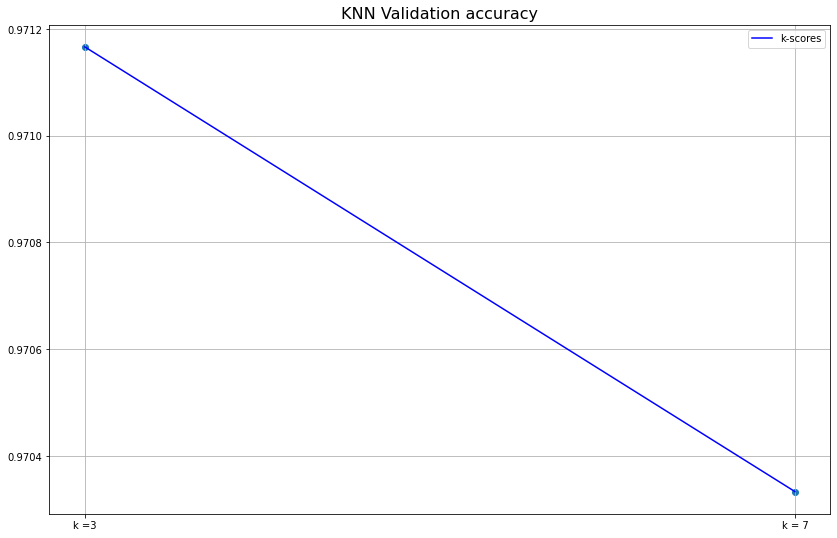

In [ ]:
plt.figure(figsize = (14, 9))
x_axis = ['k =3', 'k = 7']
axes0_acc = [accs_knn[0], accs_knn[1]] 

plt.scatter(x_axis, axes0_acc)

plt.plot(x_axis, axes0_acc, color = "blue", label = "k-scores")
plt.title("KNN Validation accuracy",fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

## 7) Test your classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data
# I have already loaded test data and applied the pre-processing 
# Hence, I will use it directly
start = timer()
# Predict
decision_tree = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = best_sample_split)
decision_tree.fit(xtrain, ytrain)
ypred_on_test = decision_tree.predict(x_testf)
acc_score_test = accuracy_score(y_test, ypred_on_test)
end = timer()

# Report your result
print("Accuracy is ", acc_score_test, " and misclassification rate is ", '{:.4f}'.format((1 - acc_score_test)), ", obtained with maximum depth = ", best_depth, " and min_samples_split = ", best_sample_split)
print("Total time = ", '{:.3f}'.format((end-start)), "s")   






Accuracy is  0.8651  and misclassification rate is  0.1349 , obtained with maximum depth =  15  and min_samples_split =  25
Total time =  8.993 s


In [ ]:
start = timer()

# Predict
knn1 = KNeighborsClassifier(n_neighbors = best_k, algorithm= "brute") # since we have a lot of features
knn1.fit(xtrain, ytrain)
ypred_on_test_knn = knn1.predict(x_testf)
acc_score_knn_test = accuracy_score(y_test, ypred_on_test_knn)
end = timer()

# Report your result
print("Accuracy is ", acc_score_knn_test, " and misclassification rate is ", '{:.4f}'.format((1 - acc_score_knn_test)),", with k = ", best_k)
print("Total time = ", '{:.3f}'.format((end-start)), "s")

Accuracy is  0.9691  and misclassification rate is  0.0309 , with k =  3
Total time =  27.691 s


##8) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what kNN is or what MNIST is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in parentheses, below, and include your own report)**

( Include the problem definition: 1-2 lines )

 (Talk about train/val/test sets, size and how split. )

 (In here you would also talk about feature extraction or preprocessing - but here we dont do any.)

 ( Give the validation accuracies for different approach and meta-parameters tried **in a table** and state which one you selected as your model.)

( State  what your test results are with the chosen approach and meta-parameters: e.g. "We have obtained the best results on the validation set with the ..........approach using a value of ...... for .... parameter. The result of this model on the test data is ..... % accuracy."" 

 (Comment on the speed of the different approaches and anything else that you deem important/interesting (e.g. confusion matrix)). 

 You can add additional visualization as separate pages if you want, think of them as appendix, keeping the one-page as abstract/summary.
 
As long as you have the essential info summarizing what you have done and your results, exact format or extra content (like what you may find interesting) does not matter. You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.



### CS412 HW1 Report 
**İlker Gül - 26352**

  The problem was to classify grayscale digit images from the MNIST dataset using **Decision Tree** and **K-NN** classifiers trained on training data. Then, based on the validation accuracy scores, select the best model and evaluate its performance on the given test data.

  MNIST dataset includes train and test sets, with the train set containing 60,000 samples and the test set containing 10,000 samples. Before splitting the training set into train and validation sets, it was shuffled. The training set was then divided into train and validation sets by allocating 80% of the data(48,000) to the train set and 20% of the data(12,000) to the validation set.

  Reshaping the train and test data can be mentioned in terms of preprocessing. The training and testing data were both 3D numpy arrays. We flattened the data to 2D by reshaping it without losing any of the data's information. Furthermore, the training dataset was converted to a DataFrame using the Pandas library in order to display the attributes and see dataset samples.

  As stated in the premise, while training decision tree classifier models, different meta-parameters varying max-depth and min_samples_split were used. I chose 10, 15, and 20 for **max-depth**, and 25, 50, and 100 for **min_samples_split** meta-parameters. I came up with different accuracy values that are so close to each other by experimenting with the values of the aforementioned meta-parameters. In addition, I calculated the accuracy results of the models for the train set, the results of which can be found in section five.
  
  In the table below, you can see the validation set accuracy results;

  **Decision Tree Validation Accuracy Results**
  >Validation Accuracy Results | min_samples_split = 25 | min_samples_split = 50| min_samples_split = 100 |
>---|---|:---|:---|
>Max depth = 10|0.85066|0.84823|0.832|
>Max depth = 15|**0.86475**|0.85475|0.84066|
>Max depth = 20|0.86425|0.85458|0.84008|

  I looked at the train set accuracy and the validation set accuracy with priority when deciding which model to use in the test set. After reviewing the model scores, the model with max-depth = 15, min_samples_split = 25 has the highest accuracy score (in other words, the least error among the models) for validation set and the second best accuracy score for train set. Because the accuracy score of the validation test is very important in selecting the model, I chose this model for the test set.

  As stated in the premise, while training K-NN classifier models, k=3 and k=7 were used. I came up with different accuracy values that are so close to each other.

  In the table below, you can see the validation set accuracy results;

**K-NN Validation Accuracy Results**
>Validation Accuracy Results | Accuracy Score | 
>---|---|
>k = 3|**0.97116**|
>k = 7| 0.97033|

  After reviewing the model scores, the model with k = 3 has the highest accuracy score (in other words, the least error among the models) for validation set. In addition, it has the highest accuracy score for train set. Therefore, I chose this model.

  After selecting the models for Decision Tree and K-NN, we calculated the accuracy scores of each model with the test data. The accuracy scores of the each model can be found in the table below.

**Test Set Accuracy Results**
>Test Set Accuracy Results | Accuracy Score | 
>---|---|
>Decision Tree Classifier with max depth = 15, min_samples_split = 25|0.8651|
>K-NN Classifier with k = 3| 0.9691|

  To see the the total time spended on each model, I use *default_timer* library. Although I use 9 different models for Decision Tree for validation set, total time was 77.149 s. However, 2 different models were used for validation set and it took 73.557 s. I applied the same models for train set accuracy where decision tree models took 77.472 s while k-nn models took 294.337 s. Finally, for train set decision tree model took 8.993 s while knn model took 27.691 s. After checking time costs for train, validation and test sets; I can state that K-NN classifier was slower than Decision Tree classifier.

  In conclusion, I find very interesting to see the differences of k-nn and decision tree with respect to accuracy scores. I, additionally, saw the importance of checking the accuracy score on validation set while varying with meta-parameters to choose the best model for test set.








### Link for access

https://colab.research.google.com/drive/1dndUr6eCmUUn15RR8sKdnC6B31FBI0L2?usp=sharing